# Optimal savings and portfolio choice

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameter values used throughout the assignment
beta = 0.9          # Discount factor
gamma = 4.0         # Absolute risk aversion
sigma2 = 0.16**2    # Variance of risky return shock
sigma  = 0.16       # Std. dev. of risky return shock
mu = 0.04           # Expected excess return
w = 1.0             # Initial wealth
Rf = 1.0            # Risk-free gross return

## Task 1

In [2]:
# Discrete approximation of the shock eta
shock_values = np.array([-np.sqrt(3), 0.0, np.sqrt(3)])   # Possible realizations for the shock 
shock_probs  = np.array([1/6, 2/3, 1/6])                  # Corresponding probabilities

# Risky gross return in each state
R = Rf + mu + sigma * shock_values

# Expected gross risky return E[R]
E_R = np.sum(shock_probs * R)
print(f"E[R] = {E_R:.4f}")

# Variance of risky return Var(R)
Var_R = np.sum(shock_probs * (R - E_R)**2)
print(f"Var(R) = {Var_R:.4f}")

# Expected excess return (risk premium) E[R] - Rf
Risk_premium = E_R - Rf
print(f"Risk premium = {Risk_premium:.4f}")

# Sharpe ratio (E[R] - Rf) / sgrt(Var_R)
sharpe = Risk_premium / np.sqrt(Var_R)
print(f"Sharpe ratio= {sharpe:.4f}")

# Comparison with target parameters
print("We see that the results we computed are consistent with the parameters in the table.")

E[R] = 1.0400
Var(R) = 0.0256
Risk premium = 0.0400
Sharpe ratio= 0.2500
We see that the results we computed are consistent with the parameters in the table.


## Task 2

In [3]:
# Defines the CARA utility function for consumption
def util(c, gamma):
    """
    Return the flow utility of consumption for a given risk aversion.
    """
    return -np.exp(-gamma*c)

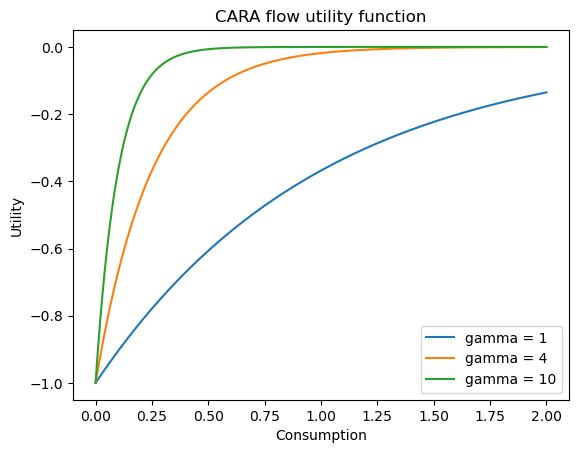

In [4]:
# Grid of 1000 consumption values between 0 and 2
consumption_grid = np.linspace(0, 2, 1000)

# Gamma values (Risk aversion)
gamma_values = [1, 4, 10]

# Utility plot for each gamma
for g in gamma_values:
    u = util(consumption_grid, g)          
    plt.plot(consumption_grid, u, label=f"gamma = {g}")

# Add axis labels and a legend to make the plot clearer
plt.xlabel("Consumption")
plt.ylabel("Utility")
plt.title("CARA flow utility function")
plt.legend()

# Display the plot
plt.show()


## Task 3

In [5]:
# Expected lifetime utility for a two-period consumption–savings problem
def expected_util(s, alpha, beta, gamma, sigma, mu, w, etas, probs): 
    """
    Calculate the expected lifetime utility for given parameters.
    """
    
    # Risky return in each state
    R = Rf + mu + sigma * etas

    # Period 1 consumption
    c1 = w - s

    # Period 2 consumption in each state
    c2 = (R * alpha + Rf * (1 - alpha)) * s

    # Expected utility in period 2
    expected_u2 = np.sum(probs * util(c2, gamma))

    # Lifetime expected utility
    return util(c1, gamma) + beta * expected_u2



## Task 4

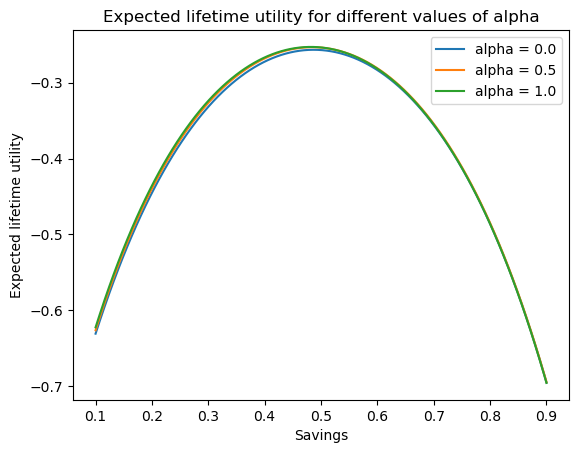

In [6]:
# Grid of 200 savings values between 0.1 and (w - 0.1)
saving_grid = np.linspace(0.1, w - 0.1, 200)

# Shares invested in the risky asset
alpha_values = [0.0, 0.5, 1.0]

# Plot expected lifetime utility for each alpha
for alpha in alpha_values:
    
    # Store expected utility for each savings level
    utility_values = []
    for s in saving_grid:
        U = expected_util(s, alpha, beta, gamma, sigma, mu, w, shock_values, shock_probs)
        utility_values.append(U)

    plt.plot(saving_grid, utility_values, label=f"alpha = {alpha}")

# Add axis labels and a legend to make the plot clearer
plt.xlabel("Savings")
plt.ylabel("Expected lifetime utility")
plt.title("Expected lifetime utility for different values of alpha")
plt.legend()
plt.show()



The curves show how utility changes with different levels of saving.
Saving more increases future consumption but reduces consumption today.
Different values of α change how much risk the investor takes, which affects expected utility.

## Task 5

In [7]:
def find_optimum(beta, gamma, sigma, mu, w, etas, probs): 
    """
    Find the optimal savings level and risky share to maximize expected utility.
    """

    # Grid of 1000 possible saving levels between (1e-6 and w - 1e-6)
    saving_grid = np.linspace(1e-6, w - 1e-6, 1000)

    # Grid of 1000 possible shares in the risky asset between (0 and 1)
    alpha_grid = np.linspace(0.0, 1.0, 1000)

    # Initialize best values
    optimal_utility = -1e10   # Start with a very low value so the best utility can be updated during the search
    optimal_saving = 0.0
    optimal_alpha = 0.0

     # Loop over alpha
    for alpha in alpha_grid:

        # Store utility values for this alpha (one value per s)
        utility_values = []
        for s in saving_grid:
            U = expected_util(s, alpha, beta, gamma, sigma, mu, w, etas, probs)
            utility_values.append(U)

        # Find best saving for this alpha
        best_index = np.argmax(utility_values)

        # Update overall optimum if this alpha gives a higher utility
        if utility_values[best_index] > optimal_utility:
            optimal_utility = utility_values[best_index]
            optimal_saving = saving_grid[best_index]
            optimal_alpha = alpha

    # Return optimal savings, portfolio share, and maximum utility
    return optimal_saving, optimal_alpha, optimal_utility

## Task 6

In [8]:
optimal_saving, optimal_alpha, optimal_utility = find_optimum(beta, gamma, sigma, mu, w, shock_values, shock_probs)

print(f"Optimal savings = {optimal_saving:.4f}")
print(f"Optimal risky share alpha = {optimal_alpha:.4f}")
print(f"Maximum expected utility = {optimal_utility:.6f}")


Optimal savings s = 0.4825
Optimal risky share alpha = 0.8098
Maximum expected utility = -0.252800


## Task 7

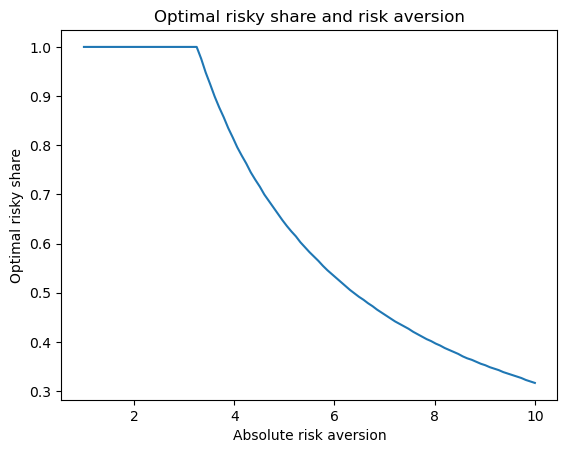

In [13]:
# Grid of 101 gamma values between 1 and 10
gamma_grid = np.linspace(1.0, 10.0, 101)

# Store optimal risky share for each gamma
optimal_alpha_values = []

# Loop over gamma values
for gamma in gamma_grid:

    # Find optimal choices for this gamma (same parameters as before)
    optimal_saving, optimal_alpha, optimal_utility = find_optimum(beta, gamma, sigma, mu, w, etas=shock_values, probs=shock_probs)

    # Save optimal risky share
    optimal_alpha_values.append(optimal_alpha)

# Plot alpha* against gamma
plt.plot(gamma_grid, optimal_alpha_values)

# Add axis labels to make the plot clearer
plt.xlabel("Absolute risk aversion")
plt.ylabel("Optimal risky share")
plt.title("Optimal risky share and risk aversion")
plt.show()


As γ increases, the optimal risky share decreases. Higher risk aversion makes the investor prefer safer assets and reduce exposure to risk.

## Task 8

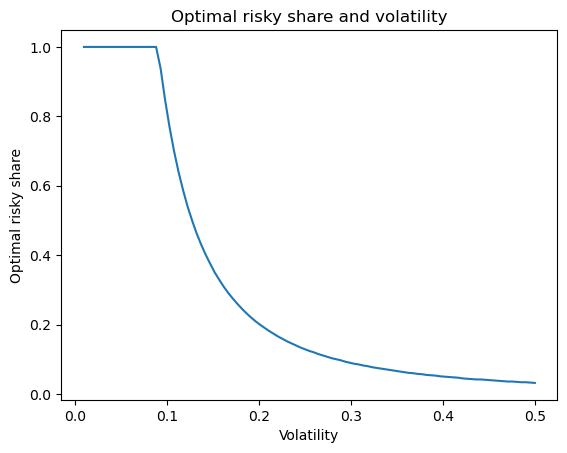

In [14]:
# Grid of 101 sigma values between 0.01 and 0.5
sigma_grid = np.linspace(0.01, 0.5, 101)

# Store optimal risky share for each sigma
optimal_alpha_values = []

# Loop over sigma values
for sigma in sigma_grid:

    # Find optimal choices for this sigma
    optimal_saving, optimal_alpha, optimal_utility = find_optimum(beta, gamma, sigma, mu, w, etas=shock_values, probs=shock_probs)

    # Save optimal risky share
    optimal_alpha_values.append(optimal_alpha)

# Plot alpha* against sigma
plt.plot(sigma_grid, optimal_alpha_values)

# Add axis labels to make the plot clearer
plt.xlabel("Volatility")
plt.ylabel("Optimal risky share")
plt.title("Optimal risky share and volatility")
plt.show()


As σ increases, the optimal risky share also decreases. Higher volatility means more uncertainty, so the investor invests less in the risky asset.